# Read in data

In [1]:
import numpy as np
import pandas as p
news_df = p.read_csv("C:/Users/prank/OneDrive/Desktop/Semesters/Summer/IST 736 TXT MIN/Data/abcnews-date-text.csv")
# news_df['Date'] = p.to_datetime(news_df.publish_date)
# news_df = news_df.sort_values(by=['Date'])

# Deleting duplicates if any
news_df[news_df['headline_text'].duplicated(keep=False)].sort_values('headline_text') 
news_df = news_df.drop_duplicates('headline_text')

news_text = news_df['headline_text'].values
print(news_text[0:2])

['aba decides against community broadcasting licence'
 'act fire witnesses must be aware of defamation']


# Vectorization

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

# several commonly used vectorizer setting

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words=stop_words)
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=stop_words)
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words=stop_words)

##  Vectorize the data

In [3]:
# fit vocabulary in training documents and transform the training documents into vectors

univec_tf = unigram_count_vectorizer.fit_transform(news_text)
univec_bool = unigram_bool_vectorizer.fit_transform(news_text)
univec_tfidf = unigram_tfidf_vectorizer.fit_transform(news_text)

In [4]:
word_features_tf = unigram_count_vectorizer.get_feature_names()
print(len(word_features_tf))
print(word_features_tf[5000:5100])

38345
['boq', 'bora', 'boral', 'borat', 'borbidge', 'borce', 'bordeaux', 'border', 'bordering', 'borderline', 'borders', 'bordertown', 'bore', 'borealis', 'bored', 'boredom', 'borella', 'borer', 'bores', 'borg', 'borgas', 'borghetti', 'boring', 'boris', 'born', 'borne', 'borneo', 'boro', 'boronia', 'boros', 'borroloola', 'borrow', 'borrowed', 'borrowers', 'borrowing', 'borrowings', 'borrows', 'borussia', 'bos', 'bosca', 'boscas', 'bosch', 'bosnia', 'bosnian', 'bosnich', 'boson', 'bosque', 'boss', 'bosses', 'bosss', 'boston', 'boswell', 'botanic', 'botanical', 'botanist', 'botanists', 'botany', 'botched', 'botha', 'botham', 'bother', 'bothered', 'bothwell', 'botox', 'bots', 'botswana', 'bottas', 'bottle', 'bottled', 'bottleneck', 'bottlenecks', 'bottles', 'bottleshop', 'bottling', 'bottlo', 'bottomed', 'bottoms', 'botton', 'botulism', 'bouchard', 'boucher', 'bougainville', 'bougainvilles', 'bouganville', 'boughey', 'bought', 'bouhanni', 'boulder', 'boulders', 'boulevard', 'boulia', 'bou

In [5]:
word_features_bool = unigram_bool_vectorizer.get_feature_names()
print(len(word_features_bool))
print(word_features_bool[5000:5100])

38345
['boq', 'bora', 'boral', 'borat', 'borbidge', 'borce', 'bordeaux', 'border', 'bordering', 'borderline', 'borders', 'bordertown', 'bore', 'borealis', 'bored', 'boredom', 'borella', 'borer', 'bores', 'borg', 'borgas', 'borghetti', 'boring', 'boris', 'born', 'borne', 'borneo', 'boro', 'boronia', 'boros', 'borroloola', 'borrow', 'borrowed', 'borrowers', 'borrowing', 'borrowings', 'borrows', 'borussia', 'bos', 'bosca', 'boscas', 'bosch', 'bosnia', 'bosnian', 'bosnich', 'boson', 'bosque', 'boss', 'bosses', 'bosss', 'boston', 'boswell', 'botanic', 'botanical', 'botanist', 'botanists', 'botany', 'botched', 'botha', 'botham', 'bother', 'bothered', 'bothwell', 'botox', 'bots', 'botswana', 'bottas', 'bottle', 'bottled', 'bottleneck', 'bottlenecks', 'bottles', 'bottleshop', 'bottling', 'bottlo', 'bottomed', 'bottoms', 'botton', 'botulism', 'bouchard', 'boucher', 'bougainville', 'bougainvilles', 'bouganville', 'boughey', 'bought', 'bouhanni', 'boulder', 'boulders', 'boulevard', 'boulia', 'bou

In [6]:
word_features_tfidf = unigram_tfidf_vectorizer.get_feature_names()
print(len(word_features_tfidf))
print(word_features_tfidf[5000:5100])

38345
['boq', 'bora', 'boral', 'borat', 'borbidge', 'borce', 'bordeaux', 'border', 'bordering', 'borderline', 'borders', 'bordertown', 'bore', 'borealis', 'bored', 'boredom', 'borella', 'borer', 'bores', 'borg', 'borgas', 'borghetti', 'boring', 'boris', 'born', 'borne', 'borneo', 'boro', 'boronia', 'boros', 'borroloola', 'borrow', 'borrowed', 'borrowers', 'borrowing', 'borrowings', 'borrows', 'borussia', 'bos', 'bosca', 'boscas', 'bosch', 'bosnia', 'bosnian', 'bosnich', 'boson', 'bosque', 'boss', 'bosses', 'bosss', 'boston', 'boswell', 'botanic', 'botanical', 'botanist', 'botanists', 'botany', 'botched', 'botha', 'botham', 'bother', 'bothered', 'bothwell', 'botox', 'bots', 'botswana', 'bottas', 'bottle', 'bottled', 'bottleneck', 'bottlenecks', 'bottles', 'bottleshop', 'bottling', 'bottlo', 'bottomed', 'bottoms', 'botton', 'botulism', 'bouchard', 'boucher', 'bougainville', 'bougainvilles', 'bouganville', 'boughey', 'bought', 'bouhanni', 'boulder', 'boulders', 'boulevard', 'boulia', 'bou

# Stemming

In [7]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [8]:
unigram_bool_vectorizer2 = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words=stop_words, tokenizer = tokenize)
unigram_count_vectorizer2 = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=stop_words, tokenizer = tokenize)
unigram_tfidf_vectorizer2 = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words=stop_words, tokenizer = tokenize)

##  Vectorize the data after stemming

In [9]:
univec_stem_tf = unigram_count_vectorizer2.fit_transform(news_text)
univec_stem_bool = unigram_bool_vectorizer2.fit_transform(news_text)
univec_stem_tfidf = unigram_tfidf_vectorizer2.fit_transform(news_text)

C:\Users\prank\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [10]:
word_features_tf2 = unigram_count_vectorizer2.get_feature_names()
print(len(word_features_tf2))
print(word_features_tf2[5000:5100])

38345
['boq', 'bora', 'boral', 'borat', 'borbidge', 'borce', 'bordeaux', 'border', 'bordering', 'borderline', 'borders', 'bordertown', 'bore', 'borealis', 'bored', 'boredom', 'borella', 'borer', 'bores', 'borg', 'borgas', 'borghetti', 'boring', 'boris', 'born', 'borne', 'borneo', 'boro', 'boronia', 'boros', 'borroloola', 'borrow', 'borrowed', 'borrowers', 'borrowing', 'borrowings', 'borrows', 'borussia', 'bos', 'bosca', 'boscas', 'bosch', 'bosnia', 'bosnian', 'bosnich', 'boson', 'bosque', 'boss', 'bosses', 'bosss', 'boston', 'boswell', 'botanic', 'botanical', 'botanist', 'botanists', 'botany', 'botched', 'botha', 'botham', 'bother', 'bothered', 'bothwell', 'botox', 'bots', 'botswana', 'bottas', 'bottle', 'bottled', 'bottleneck', 'bottlenecks', 'bottles', 'bottleshop', 'bottling', 'bottlo', 'bottomed', 'bottoms', 'botton', 'botulism', 'bouchard', 'boucher', 'bougainville', 'bougainvilles', 'bouganville', 'boughey', 'bought', 'bouhanni', 'boulder', 'boulders', 'boulevard', 'boulia', 'bou

In [45]:
word_features_bool2 = unigram_bool_vectorizer2.get_feature_names()
print(len(word_features_bool2))
print(word_features_bool2[5000:5100])

26177
['conscienc', 'conscienti', 'conscious', 'conscript', 'consecr', 'consecut', 'consensu', 'consensus', 'consent', 'consequ', 'conserv', 'conservat', 'conservationist', 'conservatori', 'conservatorium', 'consid', 'consider', 'consign', 'consist', 'consol', 'consolid', 'consort', 'consortia', 'consortium', 'conspir', 'conspiraci', 'constabl', 'constanc', 'constant', 'constantin', 'constel', 'constitu', 'constitut', 'constrain', 'constraint', 'constrictor', 'construct', 'constructor', 'consul', 'consular', 'consult', 'consum', 'consumer', 'consumpt', 'cont', 'contact', 'contador', 'contagi', 'contagion', 'contain', 'contamin', 'contempl', 'contemporari', 'contempt', 'contend', 'content', 'contenti', 'contest', 'context', 'contin', 'continent', 'conting', 'continu', 'contra', 'contraband', 'contracept', 'contract', 'contractor', 'contractu', 'contradict', 'contradictori', 'contrast', 'contribut', 'contributor', 'contrit', 'control', 'controversi', 'contruct', 'conundrum', 'convector',

In [46]:
word_features_tfidf2 = unigram_tfidf_vectorizer2.get_feature_names()
print(len(word_features_tfidf))
print(word_features_tfidf2[5000:5100])

38345
['conscienc', 'conscienti', 'conscious', 'conscript', 'consecr', 'consecut', 'consensu', 'consensus', 'consent', 'consequ', 'conserv', 'conservat', 'conservationist', 'conservatori', 'conservatorium', 'consid', 'consider', 'consign', 'consist', 'consol', 'consolid', 'consort', 'consortia', 'consortium', 'conspir', 'conspiraci', 'constabl', 'constanc', 'constant', 'constantin', 'constel', 'constitu', 'constitut', 'constrain', 'constraint', 'constrictor', 'construct', 'constructor', 'consul', 'consular', 'consult', 'consum', 'consumer', 'consumpt', 'cont', 'contact', 'contador', 'contagi', 'contagion', 'contain', 'contamin', 'contempl', 'contemporari', 'contempt', 'contend', 'content', 'contenti', 'contest', 'context', 'contin', 'continent', 'conting', 'continu', 'contra', 'contraband', 'contracept', 'contract', 'contractor', 'contractu', 'contradict', 'contradictori', 'contrast', 'contribut', 'contributor', 'contrit', 'control', 'controversi', 'contruct', 'conundrum', 'convector',

# Elbow method for K-Means

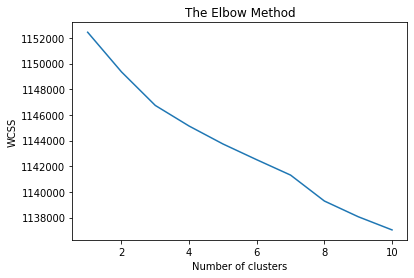

In [13]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(univec_stem_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [51]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

k_3 = 3
km_3 = KMeans(n_clusters=k_3, algorithm='auto', n_init=10, random_state=0, verbose=False, n_jobs = 1)
km_3.fit(univec_stem_tfidf)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=False)

In [52]:
common_words_3 = km_3.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words_3):
    print(str(num) + ' : ' + ', '.join(word_features_tfidf2[word] for word in centroid))

0 : new, plan, say, council, govt, australia, win, fund, kill, report, australian, water, nsw, urg, court, warn, chang, year, crash, wa, health, qld, open, death, elect
1 : man, charg, murder, court, face, jail, assault, stab, death, die, guilti, drug, sex, child, woman, accus, crash, attack, car, arrest, kill, miss, sydney, alleg, teen
2 : polic, investig, man, probe, offic, search, arrest, miss, hunt, car, death, shoot, drug, assault, seek, attack, crash, murder, charg, driver, fatal, say, suspect, raid, woman


In [53]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

k_7 = 7
km_7 = KMeans(n_clusters=k_7, algorithm='auto', n_init=10, random_state=0, verbose=False, n_jobs = 1)
km_7.fit(univec_stem_tfidf)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=False)

In [54]:
common_words_7 = km_7.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words_3):
    print(str(num) + ' : ' + ', '.join(word_features_tfidf2[word] for word in centroid))

0 : new, plan, say, council, govt, australia, win, fund, kill, report, australian, water, nsw, urg, court, warn, chang, year, crash, wa, health, qld, open, death, elect
1 : man, charg, murder, court, face, jail, assault, stab, death, die, guilti, drug, sex, child, woman, accus, crash, attack, car, arrest, kill, miss, sydney, alleg, teen
2 : polic, investig, man, probe, offic, search, arrest, miss, hunt, car, death, shoot, drug, assault, seek, attack, crash, murder, charg, driver, fatal, say, suspect, raid, woman


In [19]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

k = 8
km = KMeans(n_clusters=k, algorithm='auto', n_init=10, random_state=0, verbose=False, n_jobs = 1)
km.fit(univec_stem_tfidf)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=False)

In [21]:
common_words = km.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(word_features_tfidf2[word] for word in centroid))

0 : australia, govt, charg, fund, urg, face, hour, countri, court, council, nsw, murder, boost, new, day, drug, wa, vic, tas, qld, accus, south, sa, feder, water
1 : report, rural, nsw, sa, qld, health, releas, doctor, say, reveal, highlight, new, govt, urg, abc, abus, council, chang, polic, card, death, wa, women, climat, recommend
2 : elect, fear, labor, campaign, feder, air, council, spark, result, vote, candid, wa, poll, nsw, win, new, liber, mayor, job, parti, surgeri, green, union, qld, presid
3 : polic, investig, probe, offic, search, car, hunt, death, arrest, shoot, drug, miss, crash, charg, driver, seek, assault, fatal, attack, murder, suspect, raid, woman, station, warn
4 : man, charg, murder, jail, court, polic, stab, die, face, arrest, miss, assault, accus, guilti, death, car, kill, attack, crash, shoot, child, sydney, sex, alleg, plead
5 : new, win, council, kill, australian, warn, crash, court, year, open, water, death, sydney, hit, chang, hous, nsw, attack, home, world, 

In [40]:
labels = km.predict(univec_stem_tfidf)
centroids = km.cluster_centers_
#centroids
news_df['cluster'] = labels
news_df['cluster'].value_counts()
news_df[['headline_text','cluster']].sample(n=1000)

,headline_text,cluster
220805,sexual assault of elderly not rare service warns,5
198178,pm demands legislation to thwart terrorist attack,5
47979,residents warned about snake bites,5
1135535,star trek worst episode ever chart,5
673644,spurs held to shock fa cup draw as liverpool win,5
...,...,...
252545,claims tourists trophy croc parts,5
156061,opposition predicts longer hospital waiting lists,5
176068,stanhopes prison visit too little too late says,7
164637,sustainable housing scheme to be altered for,5


In [56]:
k_10 = 10
km_10 = KMeans(n_clusters=k_10, algorithm='auto', n_init=10, random_state=0, verbose=False, n_jobs = 1)
km_10.fit(univec_stem_tfidf)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=False)

In [57]:
common_words_10 = km_10.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words_10):
    print(str(num) + ' : ' + ', '.join(word_features_tfidf2[word] for word in centroid))

0 : plan, council, australia, win, govt, report, warn, urg, water, court, australian, chang, nsw, day, death, sydney, world, hous, wa, claim, health, interview, home, talk, test
1 : man, charg, murder, court, jail, stab, assault, guilti, death, face, drug, accus, sex, woman, child, attack, arrest, die, alleg, sydney, kill, plead, teen, shoot, car
2 : say, fund, kill, open, attack, elect, rise, hospit, hit, boost, help, coast, labor, gold, govt, council, rate, plan, australian, feder, health, nsw, bomb, price, iraq
3 : flood, flash, hit, damag, resid, qld, nsw, victim, warn, rain, road, north, evacu, clean, queensland, river, recoveri, council, farmer, kill, water, threat, fund, town, dead
4 : crash, car, fatal, plane, kill, die, driver, road, man, polic, injur, dead, bus, truck, highway, victim, pilot, woman, chopper, helicopt, investig, probe, train, near, hurt
5 : face, govern, sa, court, charg, rural, accus, feder, say, fund, water, govt, plan, nsw, ban, wa, trial, chang, countri, s